# **PREDIÇÃO DE CÂNCER COM MACHINE LEARNING**

## 1. Instalação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

## 2. Coleta dos Dados

In [2]:
#Importando as bibliotecas necessarias
import pandas as pd
import numpy as np

# Define o número de amostrar a serem geradas
n_samples = 100

# Define a semente do gerador de números aleatorios visando garantir reprodutibilidade
# Reprodutibilidade = Se refere a capacidade de obter os mesmo resultados de um experimento quando ele é repetido varias vezes.
np.random.seed(42)

# Cria um dicionario com os dados simulados para os pacientes
data = {
    # Gera uma coluna com IDs únicos para cada paciente, de 1 a 100
    "Paciente_ID": range(1,101),

    # Gera idades aleatórias entre 30 e 80 para cada paciente.
    "Idade": np.random.randint(30,81,100),

    # Atribui o sexo dos pacientes aleatoriamente  como "Masculino" ou "Feminino"
    "Sexo": np.random.choice(["Masculino", "Feminino"], 100),

    # Define o histórico familiar de câncer com 20% de probabilidade para "Sim" 80% para "Não"
    "Historico_Familiar": np.random.choice(["Sim", "Não"], 100, p=[0.2, 0.8]),

    # Gera valores de expressão do gene 1
    "Gene1_Expressao": np.random.normal (50, 15, 100),

    # Gera valores de expressão do gene 2
    "Gene2_Expressao": np.random.normal(45, 20, 100),

    # Gera valores de expressão do gene 3
    "Gene3_Expressao": np.random.normal(60, 10, 100),

    # Gera valores de expressão do gene 4
    "Gene4_Expressao": np.random.normal(55, 25, 100)
}

# Cria a coluna "Diagnostico_Cancer" com base em uma condição de expressão genética ou histórico familiar:
# Se a expressão de Gene3 > 65 e Gene4 > 60, ou se o paciente tiver histórico familiar de câncer,
# o diagnóstico é definido como "1" (câncer). Caso contrário, o diagnóstico é "0" (sem câncer).
data["Diagnostico_Cancer"] = [
    1 if (row["Gene3_Expressao"]> 65 and row["Gene4_Expressao"] > 60) or row["Historico_Familiar"] == "Sim" else 0
    for row in pd.DataFrame(data).to_dict("records")
]

# Converte o dicionario criado acima em um DataFrame do Pandas
data = pd.DataFrame(data)

# Exibe as primeiras 5 linhas do Data Frame gerado para verificação dos dados simulados.
data.head()


,Paciente_ID,Idade,Sexo,Historico_Familiar,Gene1_Expressao,Gene2_Expressao,Gene3_Expressao,Gene4_Expressao,Diagnostico_Cancer
0,1,68,Masculino,Não,63.008442,24.311953,52.981866,1.353581,0
1,2,58,Masculino,Não,64.376208,49.085659,50.328889,67.823531,0
2,3,44,Masculino,Sim,56.271778,54.624355,74.367547,24.537759,1
3,4,72,Feminino,Não,21.702079,54.341143,52.983000,25.991874,0
4,5,37,Masculino,Não,84.100177,67.740348,58.567167,53.959349,0


## 3. Pré - Processamento

In [3]:
# Verificar o tipo de dados de cada coluna
print(data.dtypes)

Paciente_ID             int64
Idade                   int32
Sexo                   object
Historico_Familiar     object
Gene1_Expressao       float64
Gene2_Expressao       float64
Gene3_Expressao       float64
Gene4_Expressao       float64
Diagnostico_Cancer      int64
dtype: object


In [4]:
# Mapeia a coluna "Sexo" para valores numéricos:
# "Masculino" é mapeado para 1 e "Feminino" para 0,
# Transformando os valores de gênero em números para simplificar a análise
data["Sexo"] = data ["Sexo"].map({"Masculino": 1, "Feminino": 0})

# Mapeia a coluna "Historico_Familiar" para valores numéricos:
# "Sim" é mapeado para 1 e "Não" para 0,
# Convertando o historico familiar para valores binarios, facilitando cálculos e o desenvolvimento do algoritmo.
data["Historico_Familiar"] = data["Historico_Familiar"].map({"Sim": 1, "Não": 0})

In [5]:
data.head()

,Paciente_ID,Idade,Sexo,Historico_Familiar,Gene1_Expressao,Gene2_Expressao,Gene3_Expressao,Gene4_Expressao,Diagnostico_Cancer
0,1,68,1,0,63.008442,24.311953,52.981866,1.353581,0
1,2,58,1,0,64.376208,49.085659,50.328889,67.823531,0
2,3,44,1,1,56.271778,54.624355,74.367547,24.537759,1
3,4,72,0,0,21.702079,54.341143,52.983000,25.991874,0
4,5,37,1,0,84.100177,67.740348,58.567167,53.959349,0


# 4. Analise Exploratoria dos Dados

## 4.1 Informações sobre o Conjunto de Dados

In [6]:
# Capturo as caracteristicas de cada coluna do meu conjunto de dados
# Count = Contagem de valores não nulos
# mean = Média 
# std = Desvio padrão
# min = Valor minimo
# 25% = Primeiro Quartil, indica valores que estão abaixo de 25%
# 50% = Valor central que separa metade dos meus valores
# 75% = Valor abaixo do qual 75% das observações estão localizadas
# max = Valor maximo
print(data.describe())

       Paciente_ID       Idade        Sexo  Historico_Familiar  \
count   100.000000  100.000000  100.000000           100.00000   
mean     50.500000   54.770000    0.580000             0.15000   
std      29.011492   14.782501    0.496045             0.35887   
min       1.000000   30.000000    0.000000             0.00000   
25%      25.750000   43.000000    0.000000             0.00000   
50%      50.500000   53.500000    1.000000             0.00000   
75%      75.250000   68.250000    1.000000             0.00000   
max     100.000000   80.000000    1.000000             1.00000   

       Gene1_Expressao  Gene2_Expressao  Gene3_Expressao  Gene4_Expressao  \
count       100.000000       100.000000       100.000000       100.000000   
mean         50.343189        43.380230        59.685169        56.652729   
std          16.491196        22.185698        10.245815        24.848717   
min          20.141007       -22.281911        33.912120         0.582965   
25%          39.6192

## 4.2 Correlação das Variáveis 

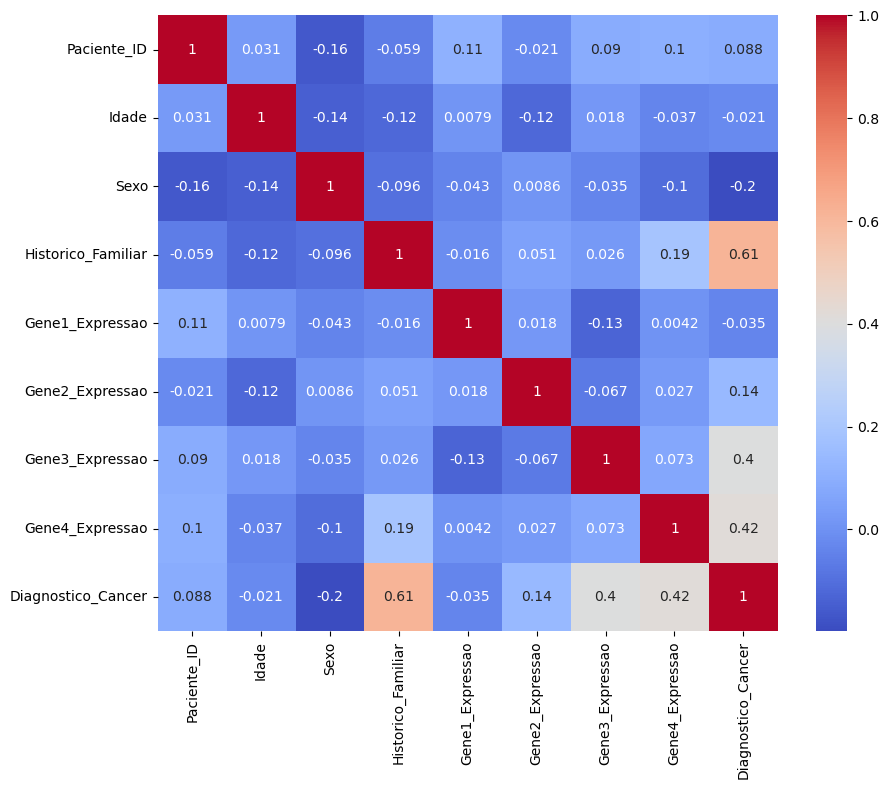

In [7]:
# Importa a biblioteca Seaborn, especializada em visualização de dados estatisticos
import seaborn as sns
# Importa a biblioteca do Matplotlib que é uma biblioteca geral de visualização em python
import matplotlib.pyplot as plt

# Define o tamanho da figura (10x8 polegadas) para melhorar a legibilidade do gráfico.
plt.figure(figsize=(10,8))

# Objetivo de criar um gráfico de mapa de calor para compreender as correlações entre as variaveis numéricas do Data Frame 'data'.
# - data.corr() calcula a matriz de correlação entre todas as colunas numéricas.
# - annot=True exibe os valores numéricos de correlação dentro de cada célula.
# - cmap="coolwarm" define a paleta de cores, onde tons de azul representam correlações negativas
#   e tons de vermelho, correlações positivas.
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")

# Exibe o gráfico
plt.show()

# Analise de Correlação com base no Gráfico de calor.

Aqui iremos demonstrar as interpretações que podemos chegar analisando o **Heatmap de Correlação** entre as variáveis.

## Escala de Cores
- A escala de cores do heatmap varia do **azul escuro ao vermelho**.
    - **Azul**: Indica correlação negativa (Relação inversa).
    - **Vermelho**: Indica correlação positiva (Relação Direta)
    - **Valores próximos de 1**: Correlação forte positiva
    - **Valores próximos de -1**: Correlação forte negativa.
    - **Valores próximos de 0**: Pouca ou nenhuma correlação entre as variáveis.

## Principais Correlações Observadas

### `Diagnostico_Cancer`
Esta variável representa o diagnóstico de câncer dos pacientes e apresenta as seguintes correlações significativas:

- **Histórico Familiar**: Correlação positiva moderada (~0.61). Pacientes com histórico familiar de câncer tendem a ter maior chance de diagnóstico positivo.
- **Gene3_Expressao** e **Gene4_Expressao**: Ambas têm correlações moderadas (~0.4 e ~0.42) com o diagnóstico de câncer, indicando que níveis elevados de expressão desses genes podem estar associados ao diagnóstico positivo.
- **Sexo**: Correlação negativa fraca (~-0.2). Uma correlação fraca, mas sugere que um dos sexos pode ter uma leve tendência a ter menos diagnósticos positivos de câncer.

### Conclusões
Com base nessa analise conseguir chegar nas seguintes definições:
- O diagnóstico de câncer (`Diagnostico_Cancer`) está mais fortemente associado a três variáveis:
    -**Historico Familiar**
    -**Gene3_Expressao**
    -**Gene4_Expressao**

## 4.3 Análise da influência de Sexo e Histórico Familiar para Diágnostico de Câncer

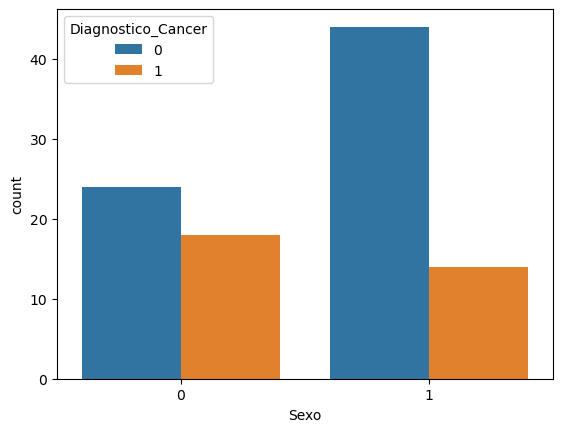

In [8]:
# Criar um gráfico de contagem para visualizar a distribuição de pacientes por sexo (Masculino e Feminino)
# x='Sexo': Define que o eixo X representa as categorias de sexo.
# hue = 'Diagnostico_Cancer': Adiciona uma distinção de cor com base no diagnostico de cancer
sns.countplot(data=data, x='Sexo', hue='Diagnostico_Cancer')
plt.show()

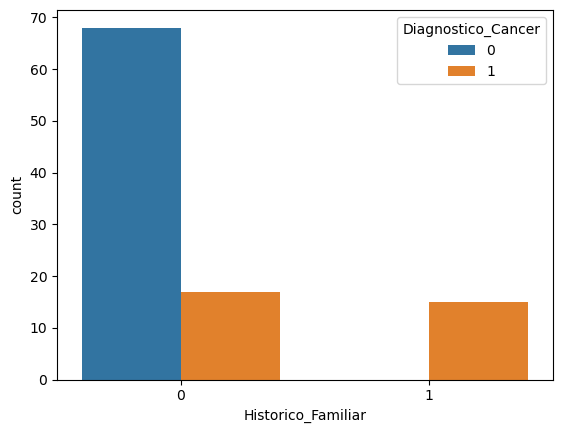

In [9]:
# Cria um gráfico de contagem para visualizar a distribuição de pacientes com e sem historico familiar
# x='Historico_Familiar': Define que o eixo X com as categorias "Sim" ou "Não" para o historico familiar.
# hue = 'Diagnostico_Cancer': Adiciona uma distinção de cor com base no diagnostico de cancer
sns.countplot(data=data, x='Historico_Familiar', hue='Diagnostico_Cancer')
plt.show()

# Análise de Diagnóstico de Câncer: Fatores `Sexo` e `Histórico_Familiar`

**Entendimento do Estudo**: Aqui vamos apresentar uma análise das variáveis `Sexo` e `Histórico_Familiar` em relação ao diagnóstico de câncer.

**Objetivo**: A análise visa identificar padrões e potenciais fatores de risco que podem ajudar na compreensão do perfil dos pacientes com maior predisposição ao câncer.

### 1. Análise da Distribuição por `Sexo`:

Observações:
-- **Pacientes Femininas (`Sexo = 0`)**: - **Pacientes Femininas (`Sexo = 0`)**: Temos uma distribuição mais equilibrada entre diagnosticos positivos e negativos.
-- **Pacientes Masculinos (`Sexo = 1`)**: Encontramos o numero de diagnósticos negativos bem maior do que positivos, isso sugere uma leve tendência de menor prevalência de câncer entre homens neste conjunto de dados.

Conclusão:
Embora ambos os sexos apresentem casos de diagnóstico positivo para câncer, as pacientes femininas parecem ter uma chance ligeiramente maior de receber um diagnóstico positivo.

### 2. Análise da Distribuição por `Histórico_Familiar`:

Observações:
-- **Pacientes sem Histórico Familiar de Câncer (`Historico_Familiar = 0`)**: A maioria dos pacientes sem histórico familiar teve um diagnostico negativo para câncer.
-- **Pacientes com Histórico Familiar de Câncer (`Historico_Familiar = 1`)**: Destes pacientes com um historico familiar, a quantidade de diagnosticos familiar é maior, o que indica uma maior prevalência de câncer neste grupo.

Conclusão:
Ter um histórico familiar de câncer parece aumentar consideravelmente a chance de diagnóstico positivo para câncer. Essa variável apresenta uma correlação positiva com o diagnóstico, sugerindo que é um fator de risco relevante.




# 4.4 Distribuição da Variável Alvo

### `Objetivo do Estudo`: Este código ajuda a visualizar a distribuição dos dados na variável alvo e é um passo importane na análise exploratória, principalmente para identificar possíveis desbalanceamento de classe.

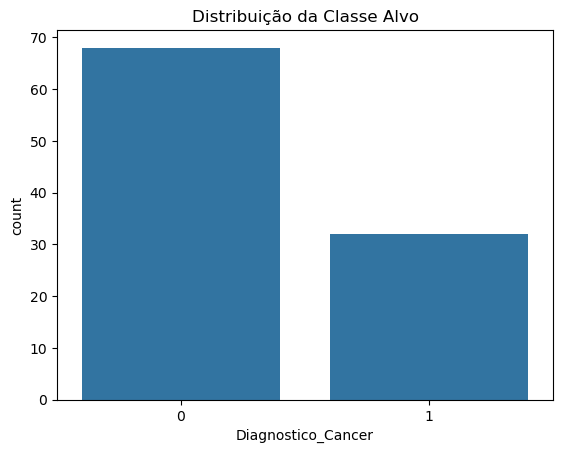

In [10]:
# Cria um grafico de contagem usando o Seaborn
sns.countplot(x="Diagnostico_Cancer", data=data)
plt.title("Distribuição da Classe Alvo")
plt.show()


# Análise da Distribuição da Variável: `Diagnostico_Cancer`

## Objetivo
A análise da variável `Diagnostico_Cancer` visa entender a distribuição entre pacientes com diagnostico de câncer.

## Resultados Observados

1. **Desbalanceamento de Classes**
    -- Com base no gráfico gerado, conseguimos entender que a quantidade de pacientes sem diágnostico de câncer de câncer (`Diagnostico_Cancer = 0`) é significativamente maior do que a quantidade de pacientes diagnosticados com câncer (`Diagnostico_Cancer = 1`).

    -- Esse desbalanceamento indica que a **maioria dos pacientes não apresenta diagnóstico de câncer** no conjunto de dados, o que pode trazer desafios para a criação de um modelo preditivo.

2. **Desafios do Desbalanceamento**
    -- Quando possuimos um conjunto de dados desbalanceados, os modelos de aprendizado de máquina tendem a favorecer pra classe majoritaria. Meste sentido, isto pode prejudicar na precisão da previsão de casos de câncer.
    -- Modelos treinados em dados desbalanceados podem apresentar **alto índice de falsos negativos**, ou seja, não identificar corretamente os pacientes diagnosticados com câncer.

3. **Próximas Ações**
    Para lidar com este desbalanceamento  e melhorar a acurácia da classe minoriatoria, podemos aplicar determinadas técnicas dentre elas:

    -- **Reamostragem**
        -**Oversampling**: Aumentar a quantidade de amostras da classe minoritária.
        - **Undersampling**: Reduzir a quantidade de amostras da classe majoritária (`Diagnostico_Cancer = 0`)

## Conclusão
A análise da variável `Diagnostico_Cancer` revela um desbalanceamento no conjunto de dados, com predominância da classe sem diagnóstico de câncer. Esse desbalanceamento pode afetar a performance dos modelos preditivos e deve ser considerado na preparação dos dados e na escolha dos algoritmos de modelagem.


  


# 5. Criação do Modelo

## Etapa de Criação do Modelo de Classificação com Random Florest

Nesta etapa, vamos desenvolver um modelo de classificação utilizando o algoritmo **Random Florest**

### 1. Motivação para o uso do Random Forest

- **Robustez e Generalização:** Random Forest é um método de aprendizado em ensemble que combina várias árvores de decisão. Ao fazer isso, ele reduz o risco de **overfitting**.

- **Desempenho com Dados Desabalanceados:** - **Importância das Variáveis (Features):** Nossa variável alvo está desbalanceada. O Random Forest possui o parâmetro `class_weight="balanced"`, que ajusta automaticamente os pesos das classes com base em sua frequência. Isso ajuda o modelo a não ignorar a classe minoritária.

- **Importância das Variáveis:** Este modelo permite identificar a importância das variáveis, facilitando a interpretação e fornecendo insights sobre quais variáveis são mais influentes para o diagnóstico de câncer



In [11]:
## Importação da função dividir os dados em treino e teste
from sklearn.model_selection import train_test_split

# Separação da variável - alvo e as variáveis preditoras
X = data.drop(columns=["Diagnostico_Cancer"])
y = data["Diagnostico_Cancer"]

# Divisão dos dados em treino e teste, com proporções balanceadas entre as classes
# - test_size=0.3: 30% dos dados serão usados para teste
# - random_state=42: fixa a divisão para reprodutibilidade
# - stratify=y: mantém a mesma proporção de classes no treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [12]:
## Importação do SMOTE para aplicar a técnica de over-sampling na classe minoritária
from imblearn.over_sampling import SMOTE

# Criação do objeto SMOTE
smote = SMOTE(random_state=42)

# Aplicação do SMOTE ao conjunto de treino para balancear as classes
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)




In [13]:
# Importação do RandomForestClassifier para criação do modelo de classificação
from sklearn.ensemble import RandomForestClassifier

# Treinando o modelo com ajuste de pesos
model = RandomForestClassifier(class_weight="balanced", random_state=42)

# Treinamento do modelo com o conjunto de treino balanceado (após aplicação do SMOTE)
model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(class_weight='balanced', random_state=42)

# 6. Avaliação do Modelo

## Avaliação do Modelo de Classificação - Random Florest

Aqui vamos descrever as abordagens e métodos de avaliação utilizados para o modelo de classificação **Random Florest**, desenvolvido para prever a variável de Diagnostico_Cancer.

## 1. Feature Importances
A importância das features mede a contribuição de cada variável indepentende para as previsões do modelo.

-- **Objetivo** Identificar as variáveis mais relevantes para o modelo.

## 2. Relatório de Classificação
Este relatório resume o desempenho do modelo, com base em três métricas principais: **Precisão** (Precision), **Revocação(Recall)** e **F1 - Score**

- **Precisão** (Precision): Proporção de previsões positivas corretas em relação a todas as previsões positivas feitas pelo modelo. Ou seja, mede o quanto o modelo acerta quando prevê uma classe positiva.
  
- **Revocação** (Recall): Proporção de previsões positivas corretas em relação a todos os casos reais positivos. Mede a capacidade do modelo de identificar todas as ocorrências de uma classe.
  
- **F1-Score**: A média harmônica entre Precisão e Revocação. Esta métrica é especialmente útil quando se busca um equilíbrio entre Precisão e Revocação.
  
- **Suporte**: Número de ocorrências de cada classe no conjunto de dados. Ajuda a entender se o modelo está equilibrado na avaliação de todas as classes.

O Relatório de Classificação fornece uma visão detalhada do desempenho para cada classe, permitindo avaliar se o modelo está mais adequado para classes específicas.

## 3. Matriz de Confusão
A **Matriz de Confusão** é uma tabela que mostra as previsões do modelo em comparação com os valores reais. Ela indica quantas previsões corretas e incorretas o modelo fez para cada classe, facilitando a análise de erros.

- **Elementos da Matriz**:
  - **Verdadeiros Positivos (TP)**: Previsões corretas para a classe positiva.
  - **Falsos Positivos (FP)**: Previsões incorretas para a classe positiva.
  - **Verdadeiros Negativos (TN)**: Previsões corretas para a classe negativa.
  - **Falsos Negativos (FN)**: Previsões incorretas para a classe negativa.

- **Objetivo**: A Matriz de Confusão ajuda a entender se o modelo está confundindo classes específicas, identificando padrões de erro que podem indicar possíveis melhorias no modelo.

## 4. Curva ROC
A **Curva ROC (Receiver Operating Characteristic)** é uma representação gráfica que mostra a relação entre a **Taxa de Verdadeiros Positivos (TPR)** e a **Taxa de Falsos Positivos (FPR)** para diferentes limiares de classificação.

- **Objetivo**: A Curva ROC e o AUC ajudam a avaliar a capacidade do modelo de discriminar entre classes ao longo de vários limiares de decisão. É uma métrica útil principalmente em cenários com classes desbalanceadas.


## 6.1 Features Importances

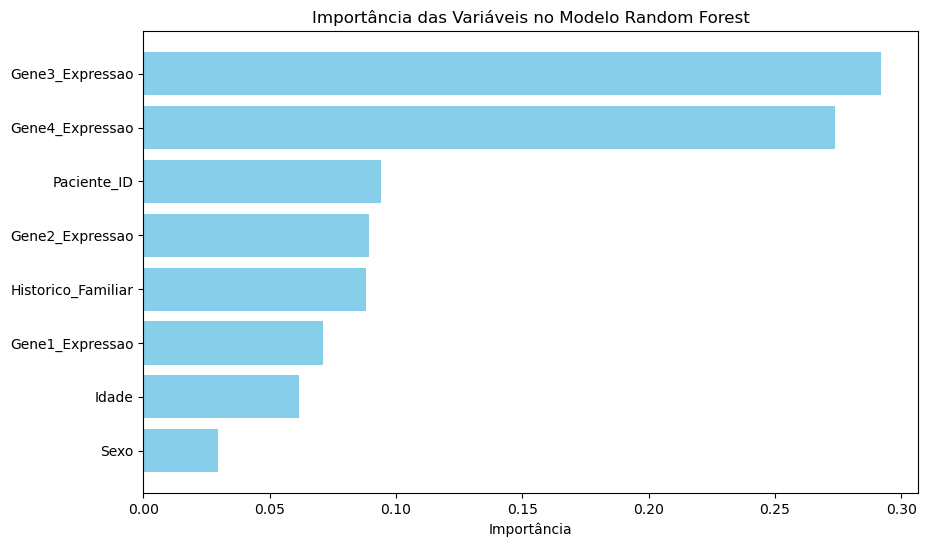

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Verifique se o modelo foi treinado e contém o atributo feature_importances_
if hasattr(model, "feature_importances_"):
    # Obtenção das importâncias das variáveis
    feature_importances = model.feature_importances_

    # Criação de um DataFrame para organizar as variáveis e suas importâncias
    features = pd.DataFrame({
        'Variável': X_train.columns,
        'Importância': feature_importances
    })

    # Ordenação das variáveis pela importância
    features = features.sort_values(by='Importância', ascending=False)

    # Plot do gráfico de importância das variáveis
    plt.figure(figsize=(10, 6))
    plt.barh(features['Variável'], features['Importância'], color='skyblue')
    plt.gca().invert_yaxis()  # Inverte a ordem para mostrar as variáveis mais importantes no topo
    plt.xlabel('Importância')
    plt.title('Importância das Variáveis no Modelo Random Forest')
    plt.show()
else:
    print("O modelo não possui o atributo feature_importances_. Verifique se o modelo foi treinado corretamente.")



## 6.2 Relatório de Classificação

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))




Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 6.3 Matriz de Confusão

Matriz de Confusão:


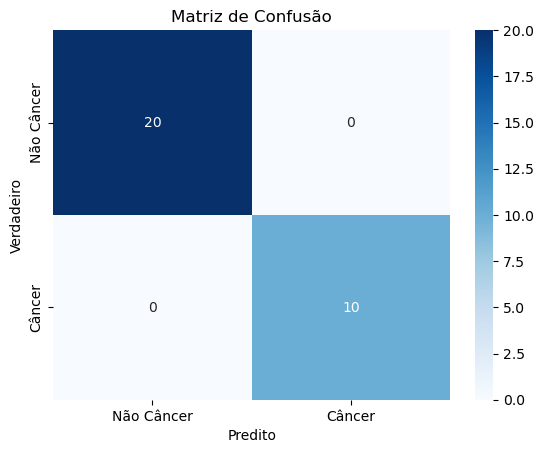

In [16]:
print("Matriz de Confusão:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Não Câncer","Câncer"], yticklabels=["Não Câncer", "Câncer"])
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()

## 6.4 Curva ROC

In [17]:
# AUC-ROC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-ROC: {auc:.2f}")

AUC-ROC: 1.00


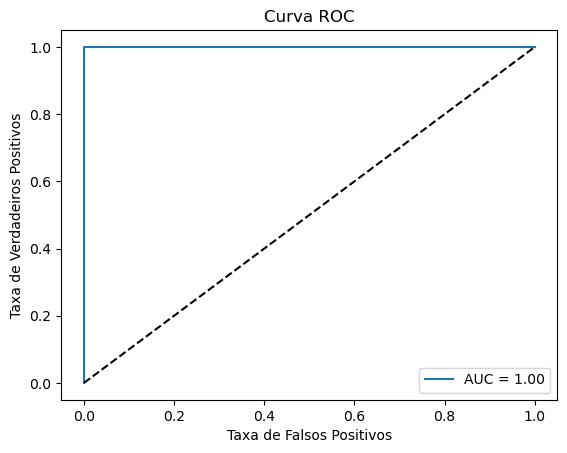

In [18]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

# 6.4 Conclusão

O projeto de predição de câncer utilizando aprendizado de máquina foi bem sucedido em explorar como a bioinformática e técnicas de data science podem contribuir para avanços no diagnóstico médio. Através de uma análise de dados genômicos simulados, foi possível desenvolver um modelo de classificação eficiente para prever o diagnóstico de câncer com base em expressões gênicas e fatores demográficos.

Os principais resultados foram:

1. **Exploração de Dados:**

    Identificação padrões e relações importantes nos dados, como a distribuição desigual entre as classes da variável alvo (**diagnóstico de câncer**), o que nos levou a aplicar técnicas adequadas para lidar com esse desequilíbrio.

    Foi constatada correlação entre algumas variáveis numéricas, o que forneceu insights úteis para a modelagem.

2. **Modelo e Avaliação:**

    Foi aplicado o modelo Random Forest, que apresentou uma performance excepcional nos dados de teste, com uma AUC = 1.0 na curva ROC, indicando uma capacidade perfeita de separar as classes (diagnóstico positivo e negativo).

    A acurácia e outras métricas (precisão, recall e F1-score) também foram altas refletindo a eficácia do modelo em prever corretamente os casos positivos e negativos.

3. **Aplicação na Bioinformática:**

    Este projeto ilustra como algoritmos de aprendizado de máquina podem auxiliar na análise de dados genômicos para prever o risco de câncer, uma aplicação real na bioinformática.

    A integração entre dados clínicos e genômicos reforça o potencial do machinel learning em decisões personalizadas e precisas no contexto médico.

Certamente, o projeto demonstra que a combinação de dados genômicos e aprendizado de máquina pode ser uma ferramenta poderosa na medicina personalizada, facilitando o diagnóstico precoce e direcionado tratamentos mais eficazes.